In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

Matplotlib created a temporary config/cache directory at /tmp/matplotlib-rf1v5wkx because the default path (/afs/ihep.ac.cn/users/f/fuys/.config/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


2.202
34.80747684679141
0.0378
18.905670379467878
0.204
3.857638503355071
0.0007208
2027.858215702447
0.0046875
0.6124522113669965


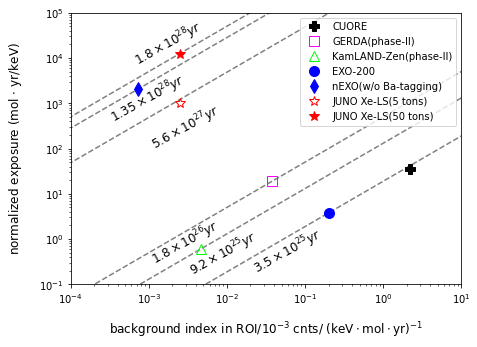

In [2]:

halftime_list = [1.8e28, 1.35e28, 5.6e27, 1.8e26, 9.2e25, 3.5e25]
N_a = 6.022e23
alpha = 1.64 # 90%CL 
constant = np.log(2)

Bi=np.arange(1e-5,50,10e-3)

fig = plt.figure(figsize=(7,5))
ax = fig.add_subplot(1,1,1)

for i in range(len(halftime_list)):
    ax.plot(Bi,pow((halftime_list[i]*alpha/(constant*N_a)),2)*Bi*1e-3,'--',color='grey')

markersize_value=10
halftime_exp = {'CUORE':3.2e25,'GERDA':1.8e26,'EXO-200':3.5e25,'nEXO':1.35e28,'KamLAND-Zen':9.2e25}
BkgIndex = {'CUORE':2.202,'GERDA':0.0378,'EXO-200':0.204,'nEXO':7.208e-4,'KamLAND-Zen':4.6875e-3}
experiment_name = ['CUORE','GERDA','EXO-200','nEXO','KamLAND-Zen']
exposure = {}
for index in experiment_name:
    exposure[index] = pow((halftime_exp[index]*alpha/(constant*N_a)),2)*BkgIndex[index]*1e-3
    print(BkgIndex[index])
    print(exposure[index])
ax.plot(BkgIndex['CUORE'],exposure['CUORE'],'P',markersize=markersize_value,label='CUORE',color='black')
ax.plot(BkgIndex['GERDA'],exposure['GERDA'],'s',markersize=markersize_value,label='GERDA(phase-II)',color='fuchsia',fillstyle='none')
ax.plot(BkgIndex['KamLAND-Zen'],exposure['KamLAND-Zen'],'^',markersize=markersize_value,label='KamLAND-Zen(phase-II)',color='lime',fillstyle='none')
#ax.plot(0.023,2.5,'^',markersize=markersize_value,label='KamLAND-Zen 800',color='lime')
ax.plot(BkgIndex['EXO-200'],exposure['EXO-200'],'o',markersize=markersize_value,label='EXO-200',color='blue')
ax.plot(BkgIndex['nEXO'],exposure['nEXO'],'d',markersize=markersize_value,label='nEXO(w/o Ba-tagging)',color='blue')
ax.plot(2.5e-3,1e3,'*',markersize=markersize_value,label='JUNO Xe-LS(5 tons)',color='red',fillstyle='none')
ax.plot(2.5e-3,1.2e4,'*',markersize=markersize_value,label='JUNO Xe-LS(50 tons)',color='red')
ax.legend(loc = 'upper right')

rotation_value = 29 
size_value=12
ax.text(0.6e-3,0.7e4,'$1.8\\times 10^{28}yr$',rotation=rotation_value,size=size_value)
ax.text(3e-4,3.9e2,'$1.35\\times 10^{28}yr$',rotation=rotation_value,size=size_value)
ax.text(1e-3,1e2,'$5.6\\times 10^{27}yr$',rotation=rotation_value,size=size_value)
ax.text(1e-3,0.28,'$1.8\\times 10^{26}yr$',rotation=rotation_value,size=size_value)
ax.text(3e-3,0.16,'$9.2\\times 10^{25}yr$',rotation=rotation_value,size=size_value)
ax.text(0.02,0.18,'$3.5\\times 10^{25}yr$',rotation=rotation_value,size=size_value)


ax.set_xlabel('background index in ROI/$10^{-3}$ cnts/ $\\rm (keV \cdot mol\cdot yr)^{-1}$',size=12,labelpad=15)
ax.set_xlim([1e-4,10])
ax.set_xscale('log')
ax.set_ylabel('normalized exposure (mol $\cdot$ yr/keV)',size=12,labelpad=15)
ax.set_ylim([0.1,1e5])
ax.set_yscale('log')
plt.savefig('./NLDBD_sensitivity.pdf')